In [1]:
install.packages("foreign")

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [3]:
library(foreign)
library(dplyr)
library(ggplot2)
library(readxl)

In [4]:
raw_welfare <- read.spss(file = "Lecture/RMD//Koweps_hpc10_2015_beta1.sav",
                        to.data.frame = T)

Warning message in read.spss(file = "Lecture/RMD//Koweps_hpc10_2015_beta1.sav", :
"Lecture/RMD//Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [5]:
welfare <- raw_welfare

In [6]:
head(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [7]:
str(welfare)

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [8]:
summary(welfare)

     h10_id        h10_ind           h10_sn        h10_merkey      
 Min.   :   1   Min.   : 1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2361   1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:23612601  
 Median :4503   Median : 1.000   Median :1.000   Median :45030401  
 Mean   :4669   Mean   : 2.612   Mean   :1.003   Mean   :46689252  
 3rd Qu.:6613   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:66130501  
 Max.   :9800   Max.   :10.000   Max.   :9.000   Max.   :98000701  
                                                                   
     h_new           h10_cobf        h10_reg5        h10_reg7    
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :0.0000   Median :1.000   Median :3.000   Median :3.000  
 Mean   :0.2009   Mean   :2.213   Mean   :2.641   Mean   :3.705  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000  
 Max.   :1.0000   Max.   :7.000   Max.   :5.000   Max.   :7.

In [9]:
welfare <- rename(welfare,
                  sex = h10_g3,            # 성별
                  birth = h10_g4,          # 태어난 연도
                  marriage = h10_g10,      # 혼인 상태
                  religion = h10_g11,      # 종교
                  income = p1002_8aq1,     # 월급
                  code_job = h10_eco9,     # 직종 코드
                  code_region = h10_reg7)  # 지역 코드

In [10]:
head(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,code_region,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [11]:
table(welfare$sex)


   1    2 
7578 9086 

In [12]:
#전처리 
#이상치 / 결측치
welfare$sex <- ifelse(welfare$sex==9, NA, welfare$sex)

In [13]:
table(is.na(welfare$sex))


FALSE 
16664 

In [14]:
welfare$sex <- ifelse(welfare$sex==1,'male','female')
table(welfare$sex)


female   male 
  9086   7578 

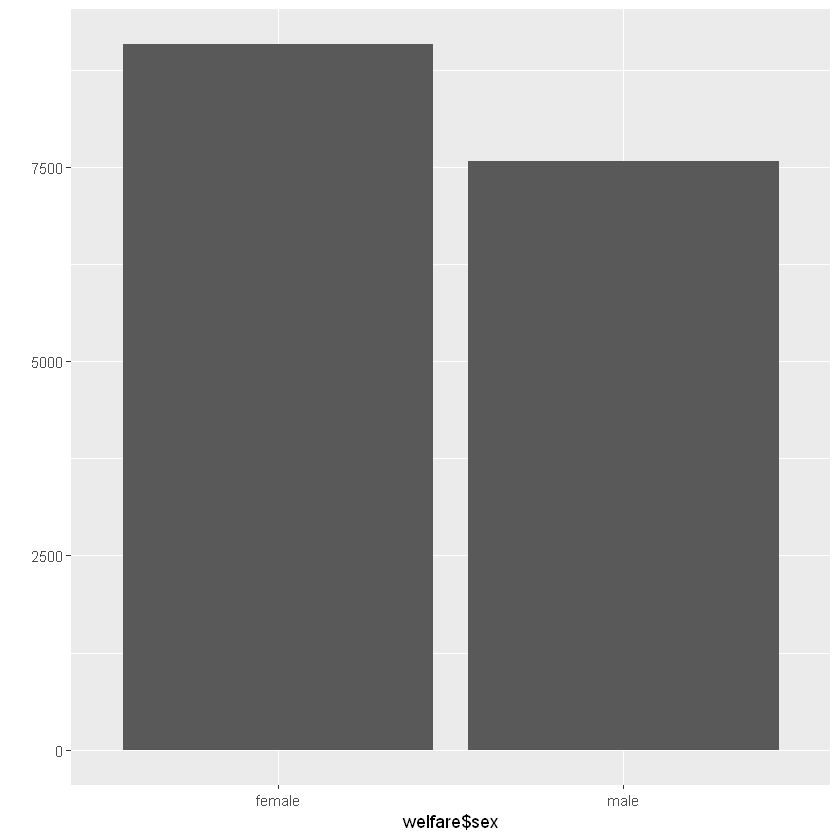

In [15]:
qplot(welfare$sex)

In [16]:
#월급 변수 검토
class(welfare$income)

[1] "numeric"

In [17]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12030 rows containing non-finite values (stat_bin)."

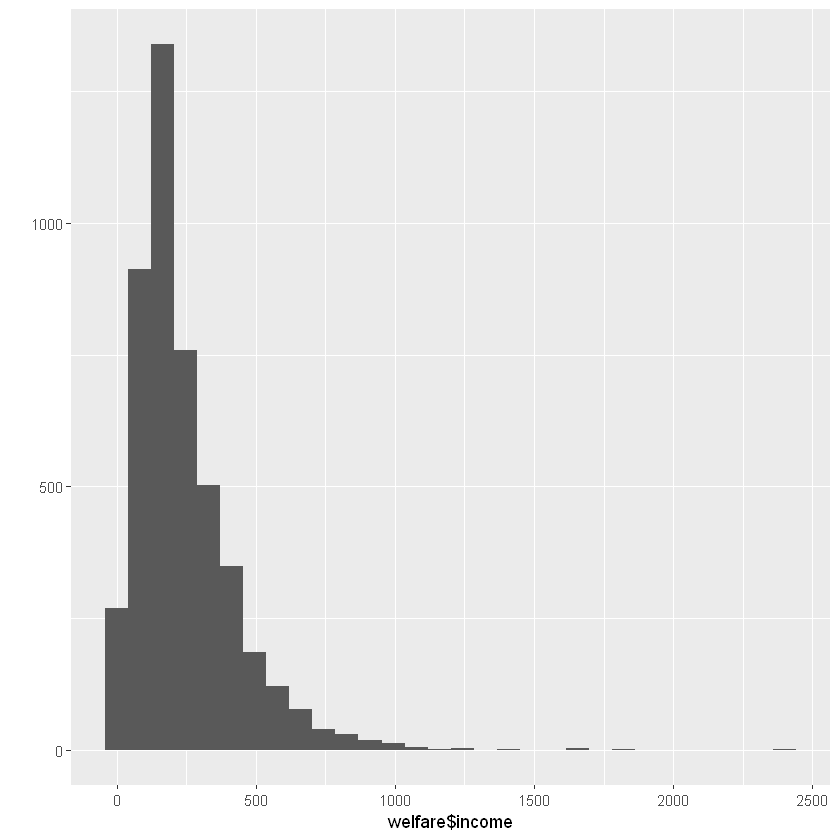

In [18]:
qplot(welfare$income)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

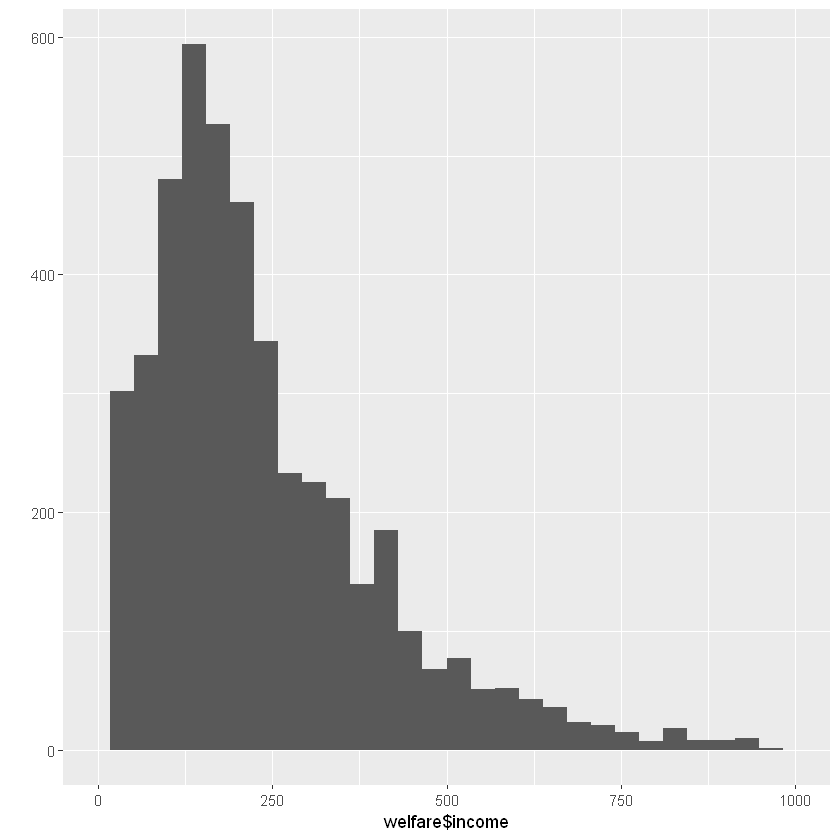

In [19]:
qplot(welfare$income) + xlim(0, 1000)

In [20]:
welfare$income <- ifelse(welfare$income %in% c(0, 9999), NA, welfare$income)

In [21]:
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [22]:
#성별 월급 평균표 만들기
sex_income <- welfare %>%
                filter(!is.na(income)) %>%
                group_by(sex) %>%
                summarise(mean_income = mean(income))
sex_income

sex,mean_income
female,163.2471
male,312.2932


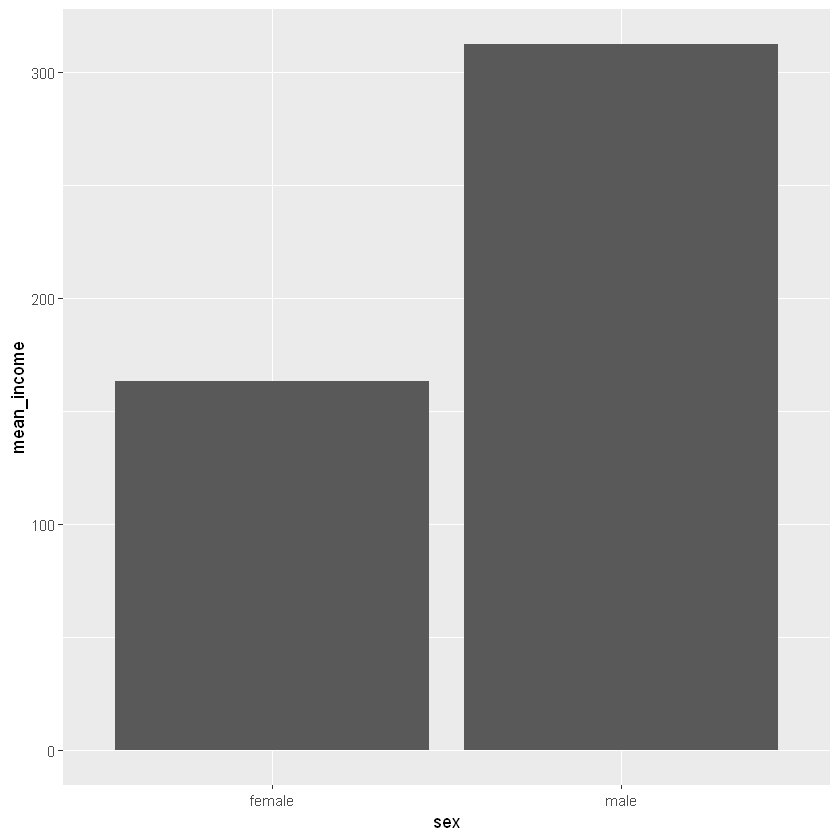

In [23]:
ggplot(data = sex_income, aes(x = sex, y = mean_income)) + geom_col()

나이에 따른 income

In [24]:
class(welfare$birth)

[1] "numeric"

In [25]:
summary(welfare$birth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


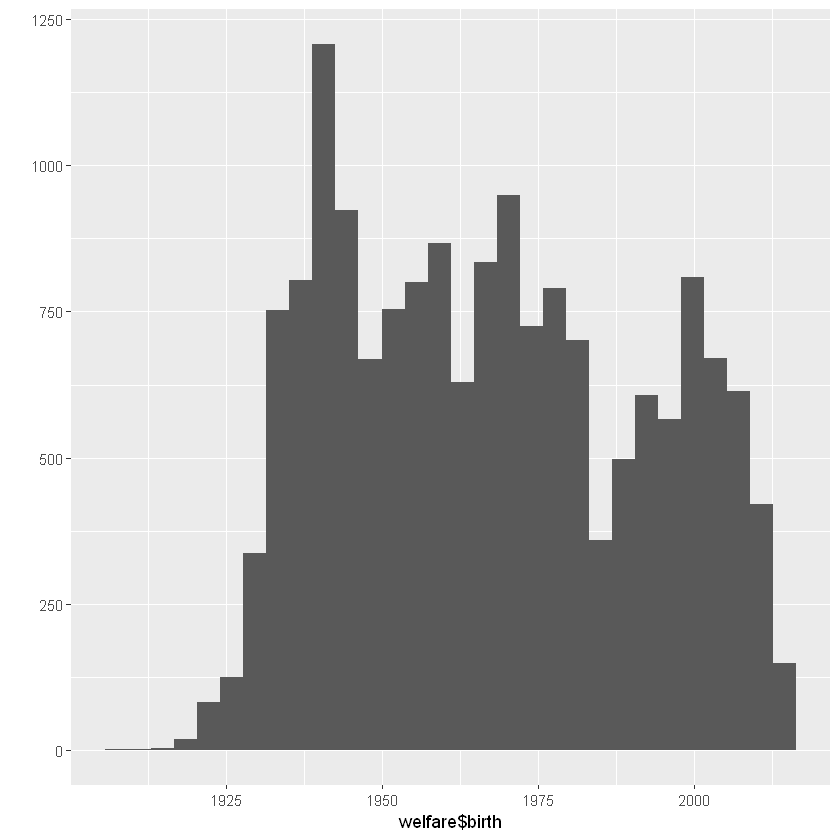

In [26]:
qplot(welfare$birth)

In [27]:
table(is.na(welfare$birth))


FALSE 
16664 

In [28]:
welfare$birth <- ifelse(welfare$birth == 9999, NA, welfare$birth)
table(is.na(welfare$birth))


FALSE 
16664 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   28.00   50.00   48.43   70.00  109.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


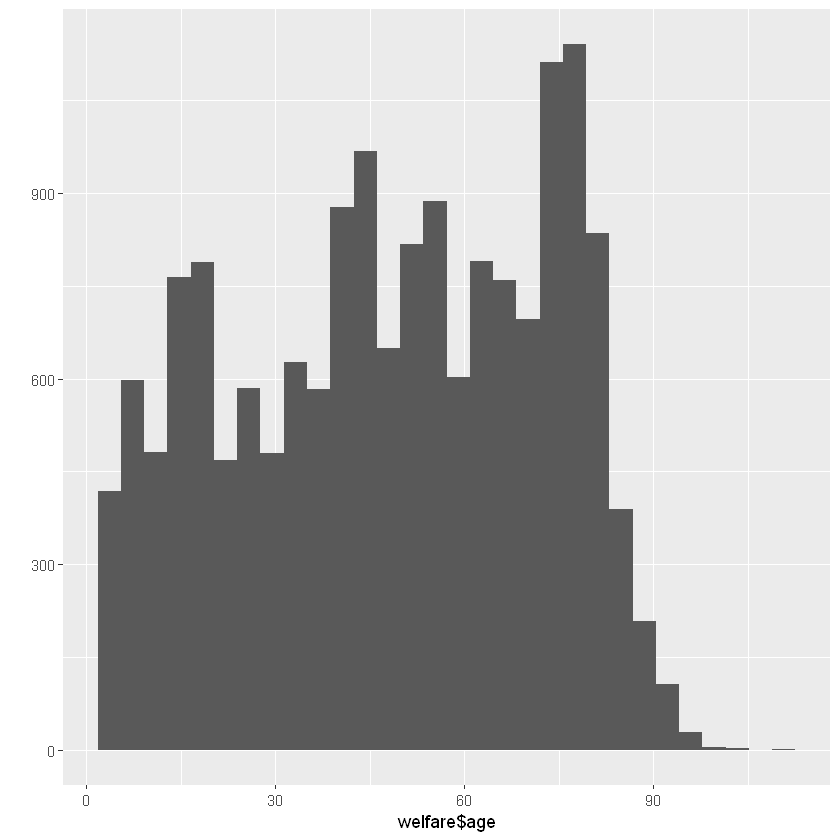

In [29]:
welfare$age <- 2015 - welfare$birth + 1
summary(welfare$age)
qplot(welfare$age)

In [30]:
age_income <- welfare %>%
  filter(!is.na(income)) %>%
  group_by(age) %>%
  summarise(mean_income = mean(income))

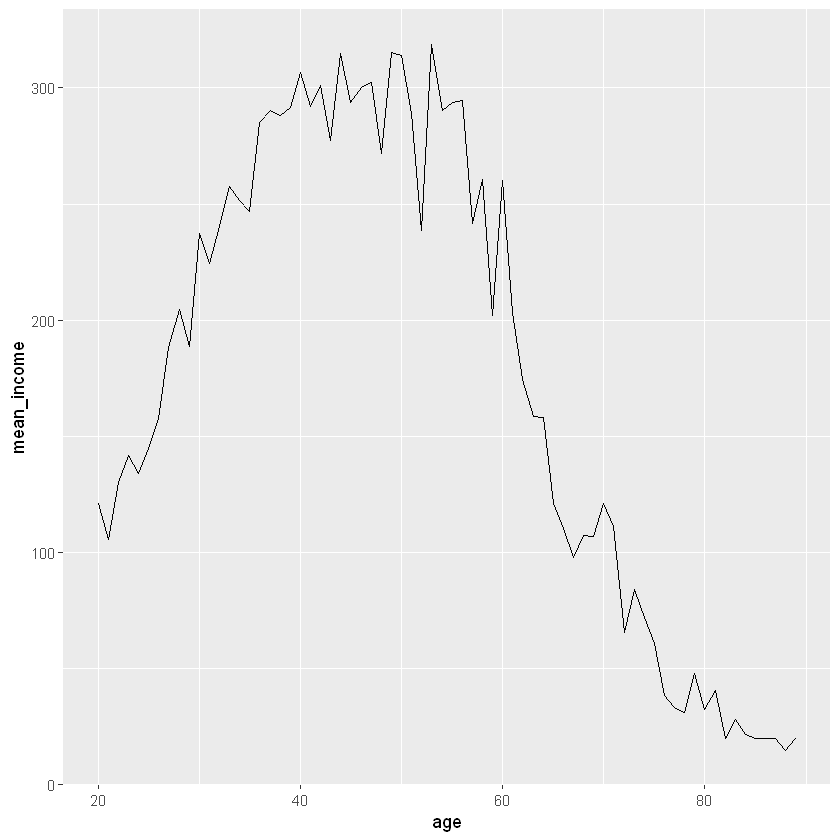

In [31]:
ggplot(data = age_income, aes(x = age, y = mean_income)) + geom_line()

#### 연령대에 따른 월급 차이 

In [32]:
#연령대, 월급
welfare <- welfare %>%
    mutate(ageg = ifelse(age < 30, "young",
                        ifelse(age <= 59,"middle", "old")))

In [33]:
table(welfare$ageg)


middle    old  young 
  6049   6281   4334 

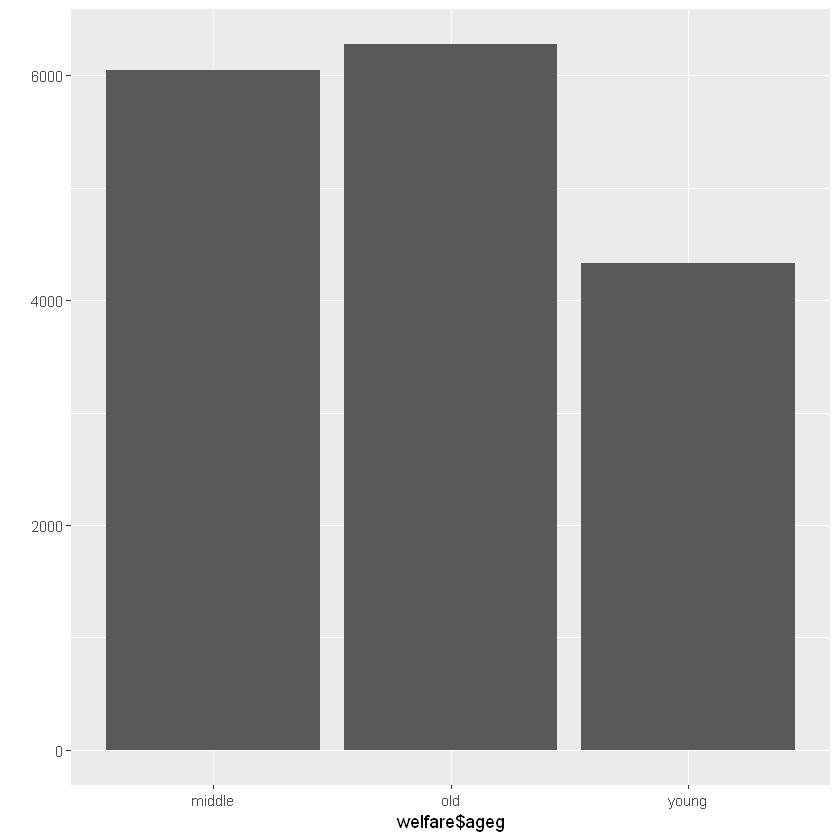

In [34]:
qplot(welfare$ageg)

#### 연령대에 따른 월급 차이 분석하기
- 연령대별 월급 평균표 만들기


In [36]:
age_income <- welfare %>%
                filter(!is.na(income)) %>%
                group_by(ageg) %>%
                summarise(mean_income=mean(income))

In [37]:
age_income

ageg,mean_income
middle,281.8871
old,125.3295
young,163.5953


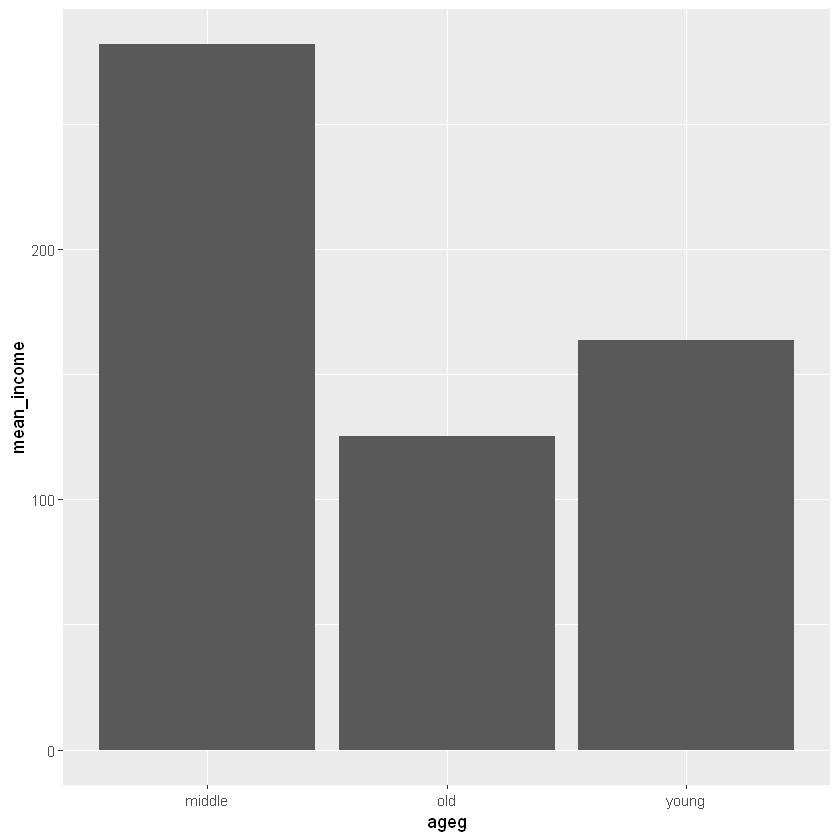

In [38]:
ggplot(data = age_income, aes(x = ageg, y = mean_income)) + geom_col()

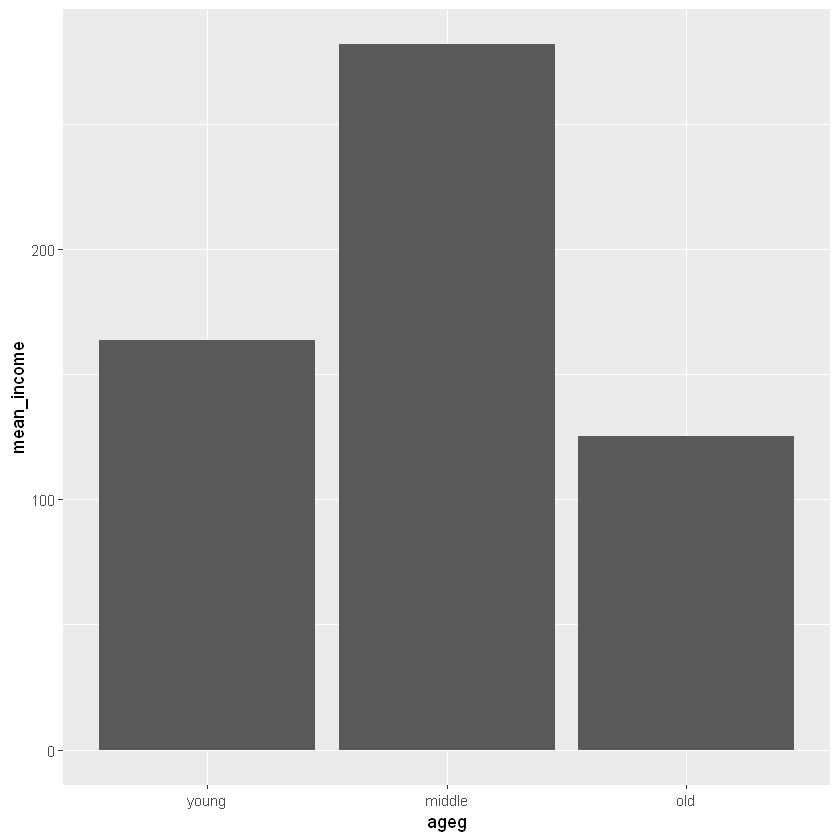

In [39]:
#막대 순서 정해주기
ggplot(data = age_income, aes(x = ageg, y = mean_income)) + geom_col() +
            scale_x_discrete(limits = c("young", "middle", "old"))

#### 연령대 및 성별 월급 차이
- 변수 : 연령대, 성별, 월급

In [40]:
ageg_sex_income <- welfare %>%
              filter(!is.na(income)) %>%
              group_by(ageg, sex) %>%
              summarise(mean_income = mean(income))

In [41]:
ageg_sex_income

ageg,sex,mean_income
middle,female,187.97552
middle,male,353.07574
old,female,81.52917
old,male,173.85558
young,female,159.50518
young,male,170.81737


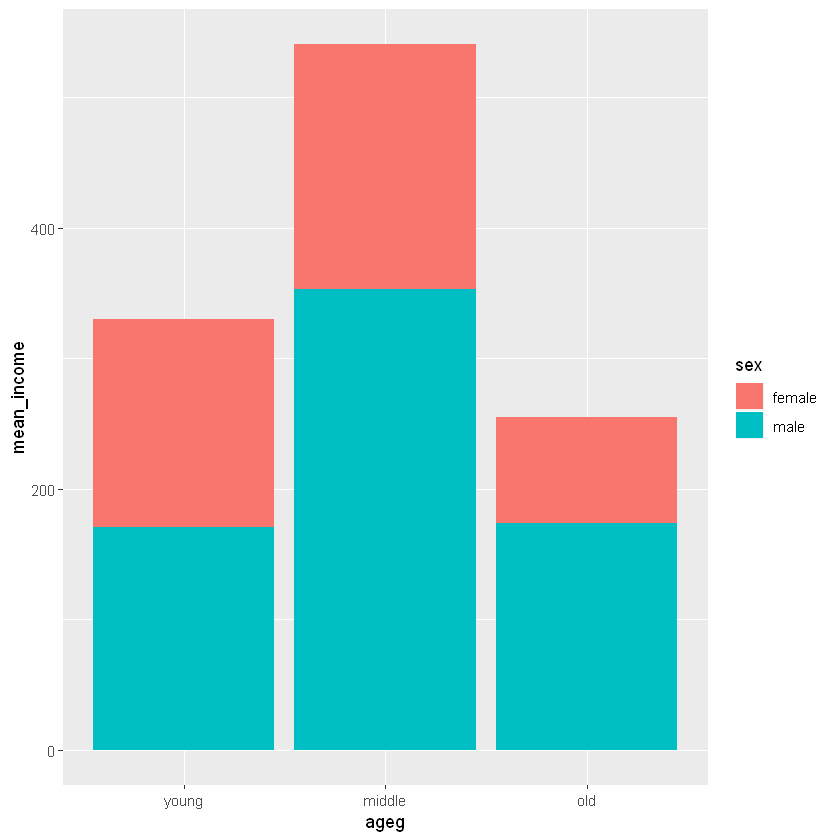

In [42]:
ggplot(data = ageg_sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
  geom_col() +
  scale_x_discrete(limits = c("young", "middle", "old"))


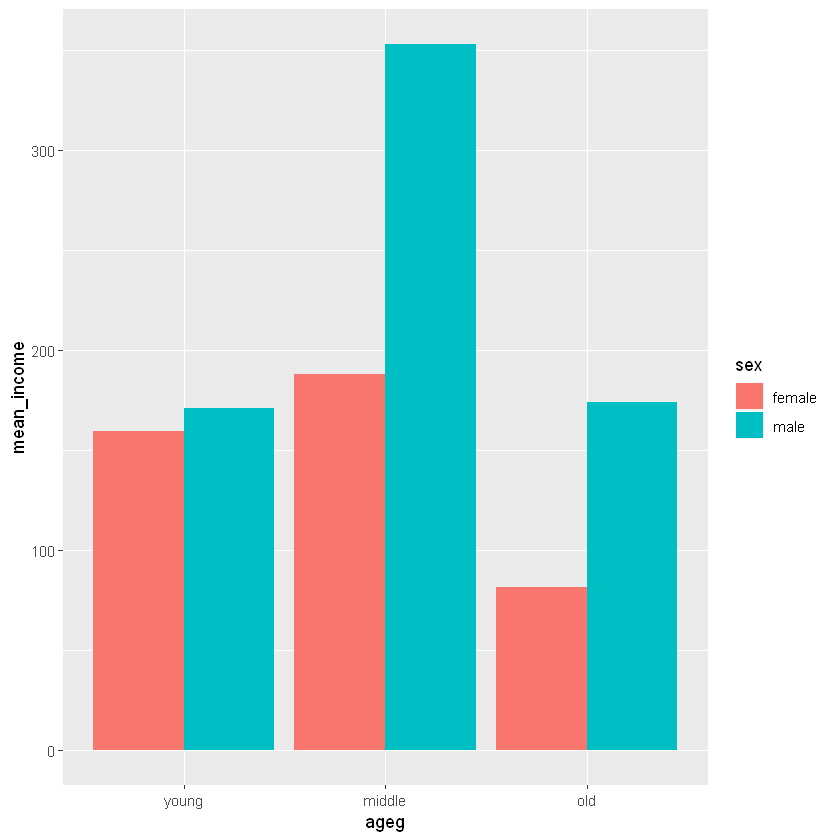

In [43]:
ggplot(data = ageg_sex_income, aes(x = ageg, y = mean_income, fill = sex)) +
  geom_col(position = "dodge") +
  scale_x_discrete(limits = c("young", "middle", "old"))


In [51]:
#성별, 나이별 평균표
sex_age <- welfare %>%
    filter(!is.na(income)) %>%
    group_by(age,sex) %>%
    summarise(mean_income=mean(income))
head(sex_age)

age,sex,mean_income
20,female,147.4500
20,male,69.0000
21,female,106.9789
21,male,102.0500
22,female,139.8547
22,male,118.2379


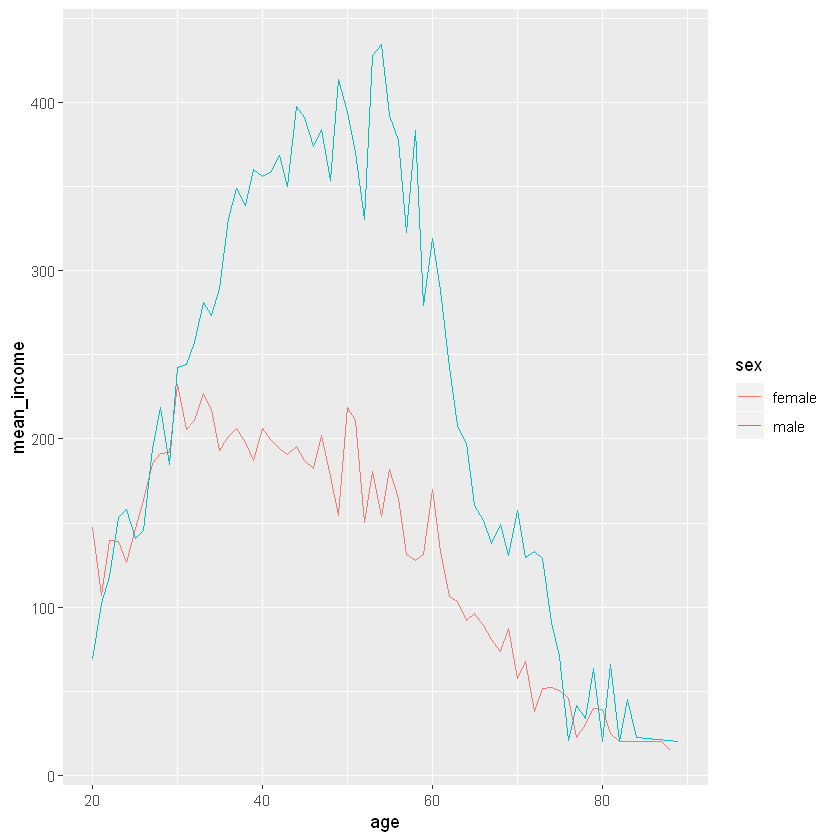

In [52]:
ggplot(data = sex_age, aes(x = age, y = mean_income, col = sex)) + geom_line()

#### 직업별 월급 차이
- "어떤 직업이 월급을 가장 많이 받을까?"

In [53]:
# 직업 / 월급
class(welfare$code_job)
table(welfare$code_job)

[1] "numeric"


 111  120  131  132  133  134  135  139  141  149  151  152  153  159  211  212 
   2   16   10   11    9    3    7   10   35   20   26   18   15   16    8    4 
 213  221  222  223  224  231  232  233  234  235  236  237  239  241  242  243 
   3   17   31   12    4   41    5    3    6   48   14    2   29   12    4   63 
 244  245  246  247  248  251  252  253  254  259  261  271  272  273  274  281 
   4   33   59   77   38   14  111   24   67  109    4   15   11    4   36   17 
 283  284  285  286  289  311  312  313  314  320  330  391  392  399  411  412 
   8   10   26   16    5  140  260  220   84   75   15    4   13   87   47   12 
 421  422  423  429  431  432  441  442  510  521  522  530  611  612  613  620 
 124   71    5   14   20   33  154  197  192  353    5  106 1320   11   40    2 
 630  710  721  722  730  741  742  743  751  752  753  761  762  771  772  773 
  20   29   30   22   16   27    3   34   34    5   49   69   27   11   61   86 
 774  780  791  792  799  8

In [54]:
library(readxl)

In [55]:
list_job <- read_excel("Lecture/RMD//Koweps_Codebook.xlsx", col_names = T, sheet = 2)
head(list_job)

code_job,job
111,의회의원 고위공무원 및 공공단체임원
112,기업고위임원
120,행정 및 경영지원 관리자
131,연구 교육 및 법률 관련 관리자
132,보험 및 금융 관리자
133,보건 및 사회복지 관련 관리자


In [57]:
# 직업명 결합
welfare <- left_join(welfare, list_job, id = "code_job")

Joining, by = "code_job"


In [58]:
welfare %>%
  filter(!is.na(code_job)) %>%
  select(code_job, job) %>%
  head(10)

code_job,job
942,경비원 및 검표원
762,전기공
530,방문 노점 및 통신 판매 관련 종사자
999,기타 서비스관련 단순 종사원
312,경영관련 사무원
254,문리 기술 및 예능 강사
510,영업 종사자
530,방문 노점 및 통신 판매 관련 종사자
286,스포츠 및 레크레이션 관련 전문가
521,매장 판매 종사자


In [61]:
job_income <- welfare %>%
    filter(!is.na(job) & !is.na(income)) %>%
    group_by(job) %>%
    summarise(mean_income = mean(income))

In [62]:
head(job_income)

job,mean_income
가사 및 육아 도우미,80.16648
간호사,240.68127
건설 및 광업 단순 종사원,190.12974
건설 및 채굴 기계운전원,357.97000
건설 전기 및 생산 관련 관리자,535.80556
건설관련 기능 종사자,246.63214


In [65]:
top10 <- job_income %>%
    arrange(desc(mean_income)) %>%
    head(10)
top10

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


In [67]:
top <- job_income %>%
    arrange(desc(mean_income))
top

job,mean_income
금속 재료 공학 기술자 및 시험원,845.0667
의료진료 전문가,843.6429
의회의원 고위공무원 및 공공단체임원,750.0000
보험 및 금융 관리자,726.1800
제관원 및 판금원,572.4067
행정 및 경영지원 관리자,563.7633
문화 예술 디자인 및 영상 관련 관리자,557.4667
연구 교육 및 법률 관련 관리자,549.9125
건설 전기 및 생산 관련 관리자,535.8056
석유 및 화학물 가공장치 조작원,531.6600


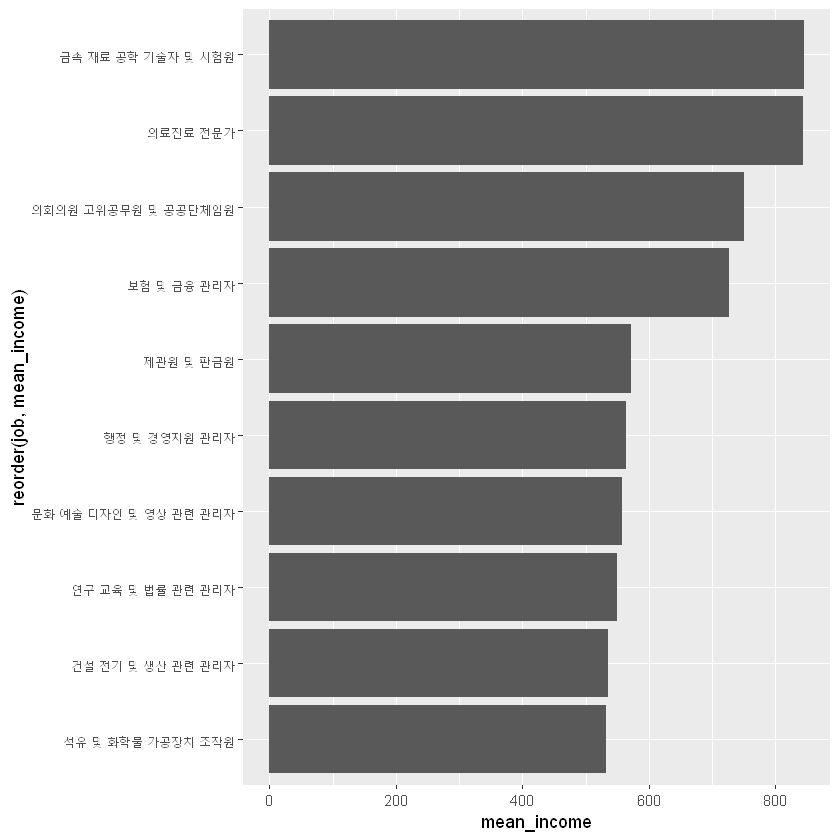

In [68]:
ggplot(data = top10, aes(x = reorder(job, mean_income), y = mean_income)) +
  geom_col() +
  coord_flip()

In [69]:
bottom10 <- job_income %>%
  arrange(mean_income) %>%
  head(10)
bottom10

job,mean_income
가사 및 육아 도우미,80.16648
임업관련 종사자,83.33000
기타 서비스관련 단순 종사원,88.22101
청소원 및 환경 미화원,88.78775
약사 및 한약사,89.00000
작물재배 종사자,92.00000
농립어업관련 단순 종사원,101.58125
의료 복지 관련 서비스 종사자,103.52643
음식관련 단순 종사원,107.84511
판매관련 단순 종사원,116.82203


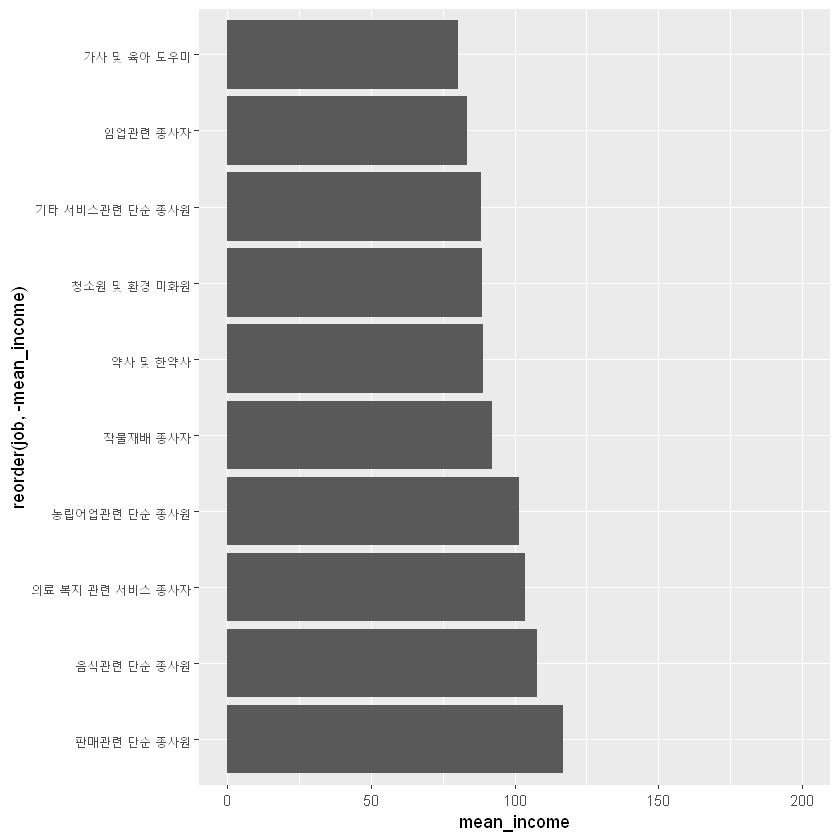

In [73]:
ggplot(data = bottom10, aes(x = reorder(job, -mean_income),
                            y = mean_income)) +
  geom_col() +
  coord_flip() +
  ylim(0, 200)

#### 성별 직업 빈도
- "성별에 따라 어떤 직업이 가장 많을까?"


성별 직업 빈도표

In [74]:
# 남자 직업 상위 10
job_male <- welfare %>%
      filter(!is.na(job) & sex == "male") %>%
      group_by(job) %>%
      summarise(n = n()) %>%
      arrange(desc(n)) %>%
      head(10)
job_male

job,n
작물재배 종사자,640
자동차 운전원,251
경영관련 사무원,213
영업 종사자,141
매장 판매 종사자,132
제조관련 단순 종사원,104
청소원 및 환경 미화원,97
건설 및 광업 단순 종사원,95
경비원 및 검표원,95
행정 사무원,92


In [75]:
# du자 직업 상위 10
job_female <- welfare %>%
      filter(!is.na(job) & sex == "female") %>%
      group_by(job) %>%
      summarise(n = n()) %>%
      arrange(desc(n)) %>%
      head(10)

job_female


job,n
작물재배 종사자,680
청소원 및 환경 미화원,228
매장 판매 종사자,221
제조관련 단순 종사원,185
회계 및 경리 사무원,176
음식서비스 종사자,149
주방장 및 조리사,126
가사 및 육아 도우미,125
의료 복지 관련 서비스 종사자,121
음식관련 단순 종사원,104


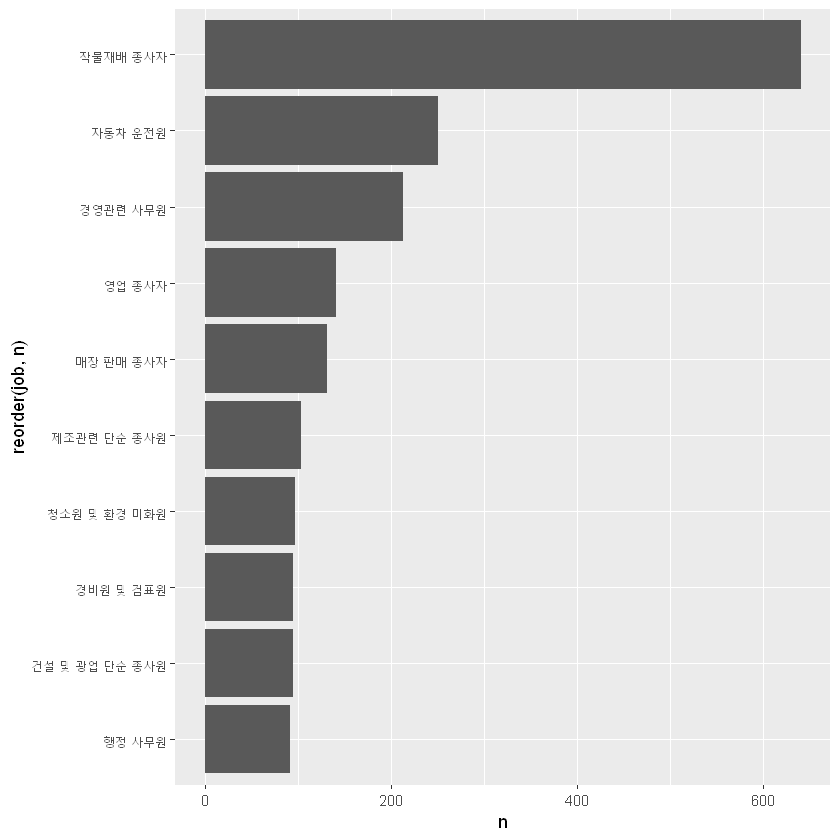

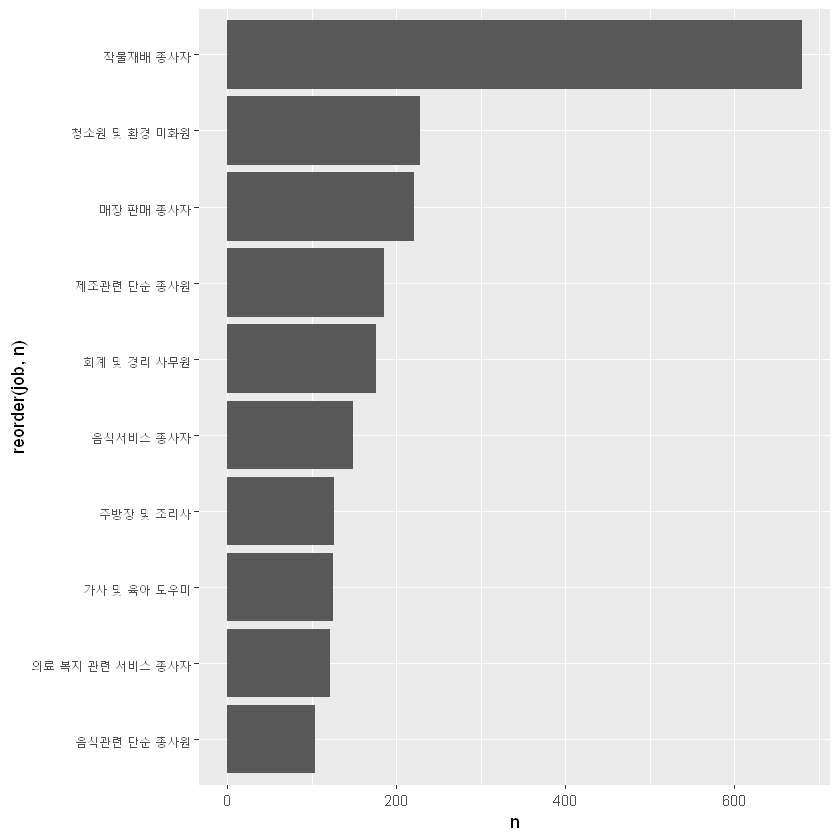

In [77]:
ggplot(data = job_male, aes(x = reorder(job, n), y = n)) +
  geom_col() +
  coord_flip()

ggplot(data = job_female, aes(x = reorder(job, n), y = n)) +
  geom_col() +
  coord_flip()

#### 종교 유무에 따른 이혼율
- "종교가 있는 사람들이 이혼을 덜 할까?"

In [78]:
class(welfare$religion)

[1] "numeric"

In [79]:
table(welfare$religion)


   1    2 
8047 8617 

In [80]:
welfare$religion <- ifelse(welfare$religion == 1, "yes", "no")
table(welfare$religion)


  no  yes 
8617 8047 

In [82]:
class(welfare$marriage)

[1] "numeric"

In [83]:
table(welfare$marriage)


   0    1    2    3    4    5    6 
2861 8431 2117  712   84 2433   26 

In [84]:
#전처리 이혼여부
welfare$group_marriage <- ifelse(welfare$marriage == 1, "marriage",
                                ifelse(welfare$marriage == 3, "divorce",NA))
table(welfare$group_marriage)


 divorce marriage 
     712     8431 

In [85]:
table(is.na(welfare$group_marriage))


FALSE  TRUE 
 9143  7521 

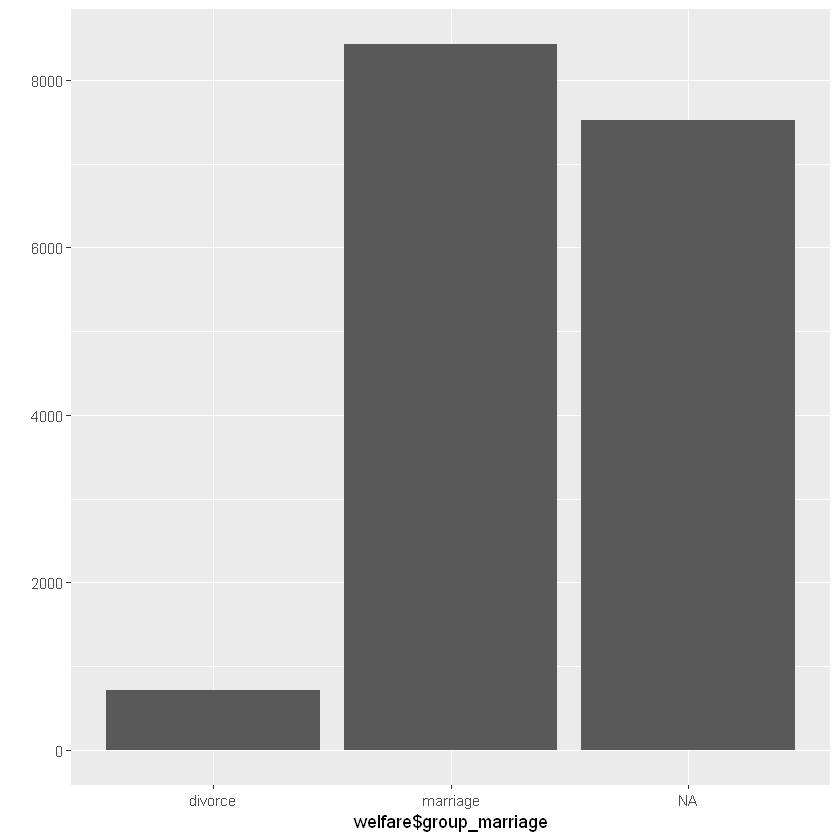

In [86]:
qplot(welfare$group_marriage)

In [88]:
religion_marriage <- welfare %>%
      filter(!is.na(group_marriage)) %>%
      group_by(religion, group_marriage) %>%
      summarise(n = n()) %>%
      mutate(tot_group = sum(n)) %>%
      mutate(pct = round(n/tot_group*100, 1))
religion_marriage

religion,group_marriage,n,tot_group,pct
no,divorce,384,4602,8.3
no,marriage,4218,4602,91.7
yes,divorce,328,4541,7.2
yes,marriage,4213,4541,92.8


In [91]:
religion_marriage <- welfare %>%
      filter(!is.na(group_marriage)) %>%
      count(religion, group_marriage) %>%
      group_by(religion) %>%
      mutate(pct = round(n/sum(n)*100, 1))
religion_marriage

religion,group_marriage,n,pct
no,divorce,384,8.3
no,marriage,4218,91.7
yes,divorce,328,7.2
yes,marriage,4213,92.8


In [93]:
divorce <- religion_marriage %>%
    filter(group_marriage == "divorce") %>%
    select(religion, pct)

In [94]:
divorce

religion,pct
no,8.3
yes,7.2


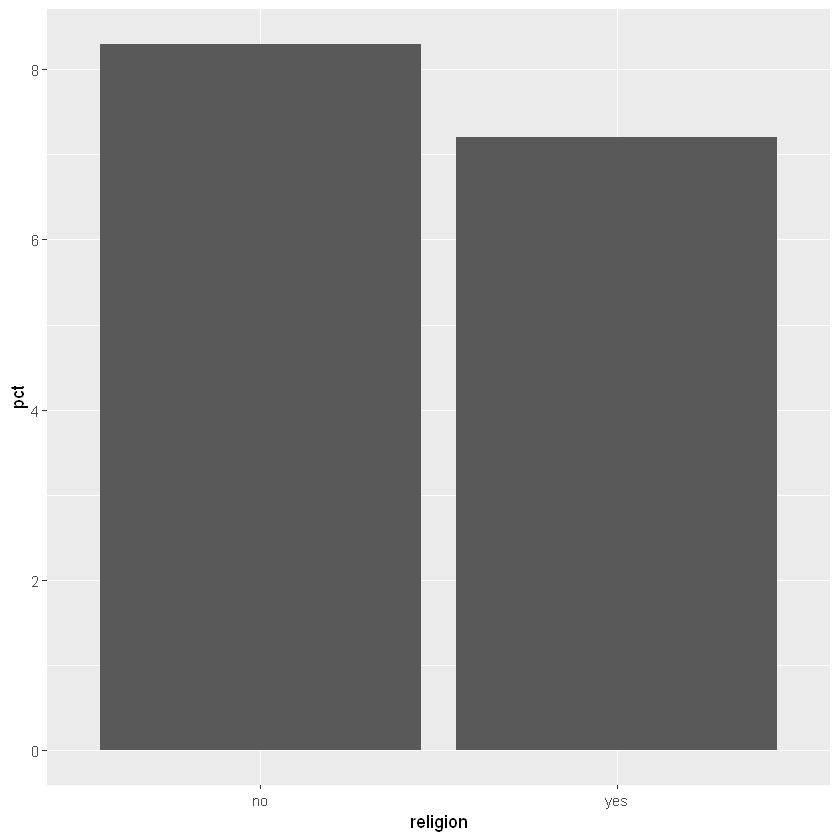

In [95]:
ggplot(data = divorce, aes(x = religion, y = pct)) + geom_col()

#### 연령대 및 종교 유무에 따른 이혼율 분석하기

In [96]:
ageg_marriage <- welfare %>%
      filter(!is.na(group_marriage)) %>%
      group_by(ageg, group_marriage) %>%
      summarise(n = n()) %>%
      mutate(tot_group = sum(n)) %>%
      mutate(pct = round(n/tot_group*100, 1))
ageg_marriage

ageg,group_marriage,n,tot_group,pct
middle,divorce,437,4918,8.9
middle,marriage,4481,4918,91.1
old,divorce,273,4165,6.6
old,marriage,3892,4165,93.4
young,divorce,2,60,3.3
young,marriage,58,60,96.7


In [98]:
ageg_marriage <- welfare %>%
      filter(!is.na(group_marriage)) %>%
      count(ageg, group_marriage) %>%
      group_by(ageg) %>%
      mutate(pct = round(n/sum(n)*100, 1))
ageg_marriage

ageg,group_marriage,n,pct
middle,divorce,437,8.9
middle,marriage,4481,91.1
old,divorce,273,6.6
old,marriage,3892,93.4
young,divorce,2,3.3
young,marriage,58,96.7


In [99]:
#초년은 제외, 이혼추출
ageg_divorce <- ageg_marriage %>%
    filter(ageg != "young" & group_marriage == "divorce") %>%
    select(ageg, pct)
ageg_divorce

ageg,pct
middle,8.9
old,6.6


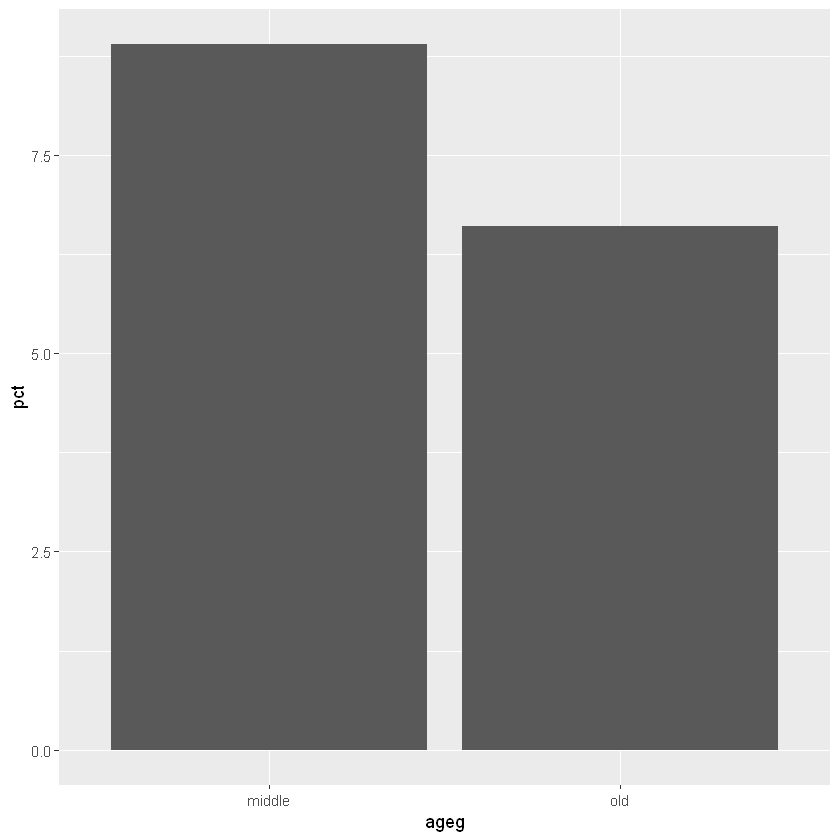

In [100]:
ggplot(data = ageg_divorce, aes(x = ageg, y = pct)) + geom_col()

In [102]:
ageg_religion_marriage <- welfare %>%
    filter(!is.na(group_marriage) & ageg != "young") %>%
    group_by(ageg, religion, group_marriage) %>%
    summarise(n = n()) %>%
    mutate(tot_group = sum(n)) %>%
    mutate(pct = round(n/tot_group*100,1))
ageg_religion_marriage

ageg,religion,group_marriage,n,tot_group,pct
middle,no,divorce,260,2681,9.7
middle,no,marriage,2421,2681,90.3
middle,yes,divorce,177,2237,7.9
middle,yes,marriage,2060,2237,92.1
old,no,divorce,123,1884,6.5
old,no,marriage,1761,1884,93.5
old,yes,divorce,150,2281,6.6
old,yes,marriage,2131,2281,93.4


In [103]:
df_divorce <- ageg_religion_marriage %>%
    filter(group_marriage == "divorce") %>%
    select(ageg, religion, pct)
df_divorce

ageg,religion,pct
middle,no,9.7
middle,yes,7.9
old,no,6.5
old,yes,6.6


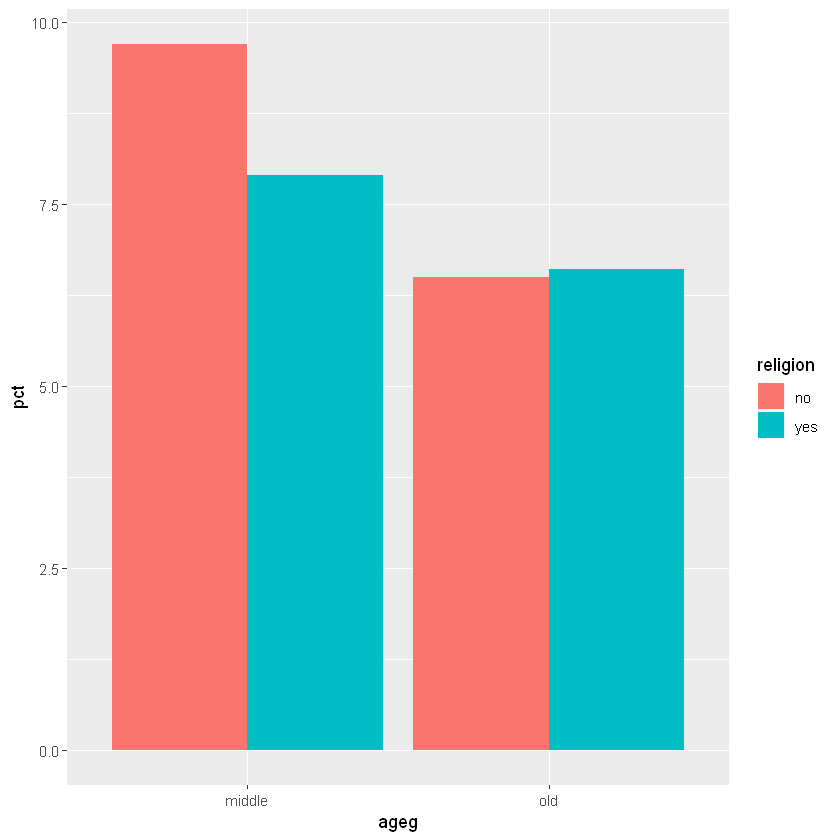

In [104]:
ggplot(data = df_divorce, aes(x = ageg, y = pct, fill = religion )) +
  geom_col(position = "dodge")

#### 지역별 연령대 비율
- "노년층이 많은 지역은 어디일까?"

In [105]:
# 지역 / 연령대
class(welfare$code_region)

[1] "numeric"

In [106]:
table(welfare$code_region)


   1    2    3    4    5    6    7 
2486 3711 2785 2036 1467 1257 2922 

In [108]:
list_region <- data.frame(code_region = c(1:7),
                          region = c("서울",
                                     "수도권(인천/경기)",
                                     "부산/경남/울산",
                                     "대구/경북",
                                     "대전/충남",
                                     "강원/충북",
                                     "광주/전남/전북/제주"))
list_region

code_region,region
1,서울
2,수도권(인천/경기)
3,부산/경남/울산
4,대구/경북
5,대전/충남
6,강원/충북
7,광주/전남/전북/제주


In [109]:
welfare <- left_join(welfare, list_region, id="code_region")

Joining, by = "code_region"


In [110]:
welfare %>%
    select(code_region, region) %>%
    head

code_region,region
1,서울
1,서울
1,서울
1,서울
1,서울
1,서울


In [111]:
region_ageg <- welfare %>%
    group_by(region, ageg) %>%
    summarise(n = n()) %>%
    mutate(tot_group = sum(n)) %>%
    mutate(pct = round(n/tot_group*100, 2))
head(region_ageg)

region,ageg,n,tot_group,pct
강원/충북,middle,417,1257,33.17
강원/충북,old,555,1257,44.15
강원/충북,young,285,1257,22.67
광주/전남/전북/제주,middle,947,2922,32.41
광주/전남/전북/제주,old,1233,2922,42.20
광주/전남/전북/제주,young,742,2922,25.39


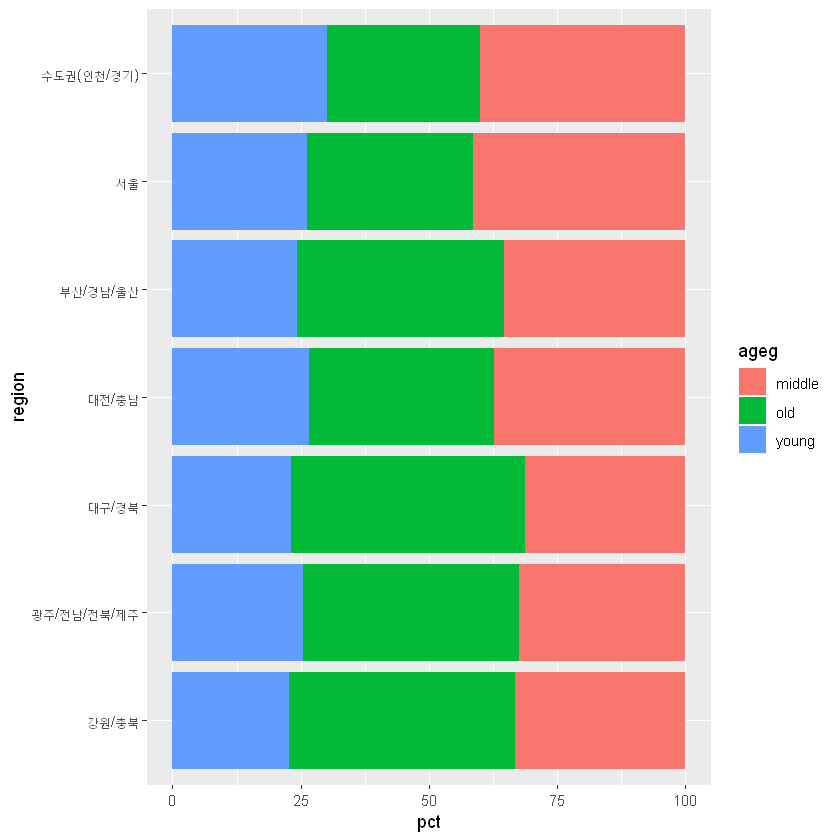

In [112]:
ggplot(data = region_ageg, aes(x = region, y = pct, fill = ageg)) +
  geom_col() +
  coord_flip()